In [1]:
# from urllib.request import urlretrieve

# def load_data(download=True):
#     if download:
#         data_path, _ = urlretrieve(
#             "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
#             "./adult.csv"
#         )
#         print("adult dataset download")


# load_data()

downloaded


<!-- https://blog.csdn.net/qq_38249388/article/details/105211405 -->

1. 连续性数值特征，如age,最好处理
2. 二分类文本信息，二分法处理
3. 多类别文本信息

- age:连续性数值变量；可能的处理方法：分年龄段；
- workcass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,State-gov, Without-pay, Never-worked.
 ：雇主类型，多类别，一般处理方法：化为数值类别，比如以上八个可以分别表示为1-8（仅为示例，本文并不推荐）；
- fnlwgt: 连续性数值变量；人口普查员认为观察值的人数。该变量在本文不被使用，笔者认为该特征并不重要。
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm,Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th,Preschool.受教育程度，多类别数据，处理方法同workcass；
- education-num: 连续性数值变量，受教育水平年限，一般来讲，该值越大，工资越高；
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated,Widowed, Married-spouse-absent, Married-AF-spouse.婚姻状况，多类别数据；
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical,Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv,Armed-Forces.职业，多类别数据；
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,Unmarried.群体性关系，多类别数据；
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.种族，多类别数据，虽然美国反对种族歧视，但是实际上这个在区分美国工资的时候蛮重要；
- sex: Female, Male.性别，最简单的二分法（0&1）；
- capital-gain: 资本收益，连续数值；
- capital-loss: 资本损失，连续数值；
- hours-per-week: 工作时间，连续数值；
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada,Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China,Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico,Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti,Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.国籍，多类别数据；
- result：结果：“>50K”或“<=50K”，二分类数据，也是本文机器学习的目的（0&1）；

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
col_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "result"]

# assign column names
adult = pd.read_csv(
  "./adult.csv",
  names=col_names,
)
# print(adult[:10])

In [4]:
adult.apply(lambda x: np.sum(x == " ?"))

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
result               0
dtype: int64

In [5]:
adult_clean = adult.replace(regex=[r"\?|\.|\$"], value=np.nan)

In [6]:
adult_clean.apply(lambda x: np.sum(x == " ?"))

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
result            0
dtype: int64

In [7]:
# Basic statistical values ​​of each variable, such as mean, median, mode
adult_clean.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# fill the missing value with mode

adult_clean.fillna(
    value={
        "workclass": adult_clean["workclass"].mode()[0],
        "ouccupation": adult_clean["occupation"].mode()[0],
        "native-country": adult_clean["native-country"].mode()[0],
    },
    inplace=True,
)

In [9]:
adult_clean.describe(include=["object"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,result
count,32561,32561,32561,30718,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,4140,13193,27816,21790,29753,24720


<Axes: ylabel='Density'>

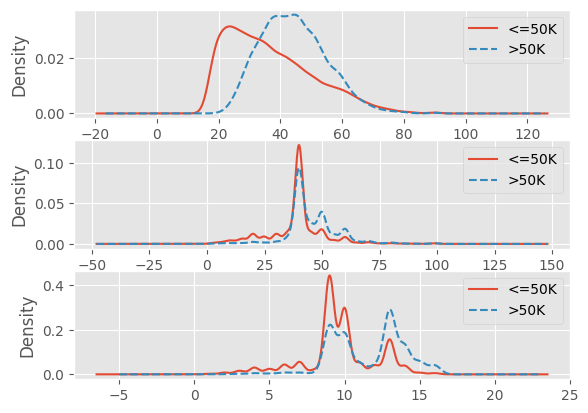

In [10]:
plt.style.use("ggplot")
fig, axes = plt.subplots(3, 1)

# age
adult_clean.age[adult_clean.result == " <=50K"].plot(
    kind="kde", label="<=50K", ax=axes[0], legend=True, linestyle="-"
)
adult_clean.age[adult_clean.result == " >50K"].plot(
    kind="kde", label=">50K", ax=axes[0], legend=True, linestyle="--"
)

# working hours
adult_clean["hours-per-week"][adult_clean.result == " <=50K"].plot(
    kind="kde", label="<=50K", ax=axes[1], legend=True, linestyle="-"
)
adult_clean["hours-per-week"][adult_clean.result == " >50K"].plot(
    kind="kde", label=">50K", ax=axes[1], legend=True, linestyle="--"
)


# education number
adult_clean["education-num"][adult_clean.result == " <=50K"].plot(
    kind="kde", label="<=50K", ax=axes[2], legend=True, linestyle="-"
)
adult_clean["education-num"][adult_clean.result == " >50K"].plot(
    kind="kde", label=">50K", ax=axes[2], legend=True, linestyle="--"
)

第一幅图展现的是，在不同收入水平下，年龄的核密度分布图，对于年收入超过5万美元的居民来说，他们的年龄几乎呈现正态分布，而收入低于5万美元的居民，年龄呈现右偏特征，即年龄偏大的居民人数要比年龄偏小的人数多。

第二幅图展现了不同收入水平下，周工作小时数的核密度图，很明显，两者的分布趋势非常相似，并且出现局部峰值。

第三幅图展现了不同收入水平下，教育时长的核密度图，很明显，两者的分布趋势非常相似，并且也多次出现局部峰值。

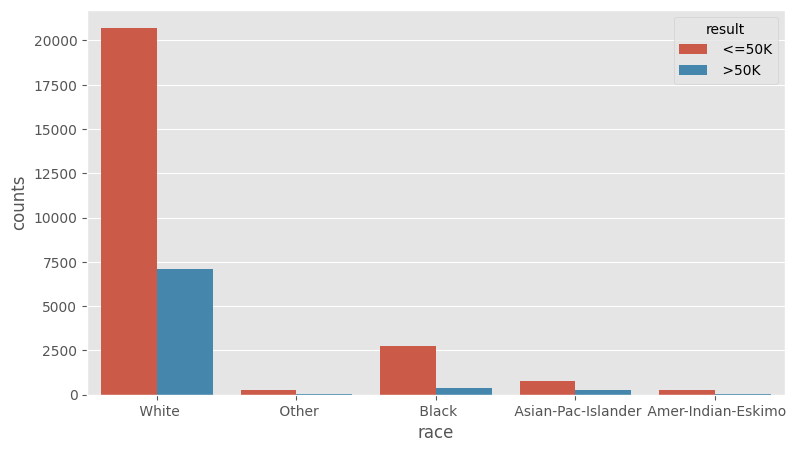

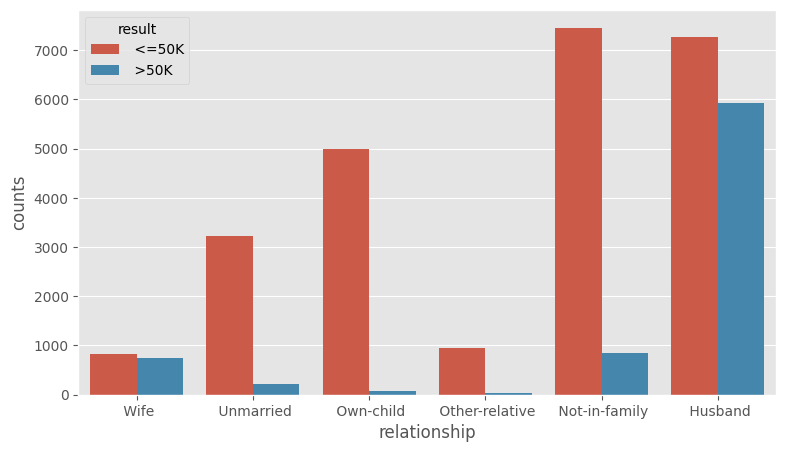

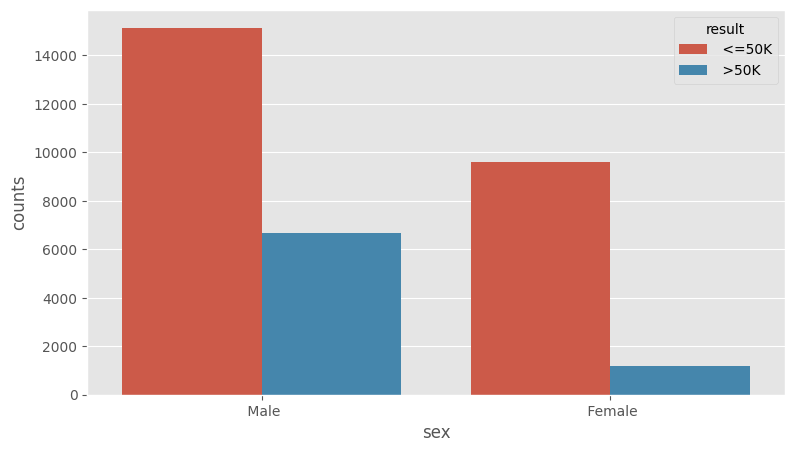

In [11]:
# Create new dataframe
# Data on the number of people of various races at different income levels
race = pd.DataFrame(
    adult_clean.groupby(by=["race", "result"]).aggregate(np.size).loc[:, "age"]
)
race = race.reset_index()
race.rename(columns={"age": "counts"}, inplace=True)
race.sort_values(by=["race", "counts"], ascending=False, inplace=True)


# number of people related to each family under different income levels
relationship = pd.DataFrame(
    adult_clean.groupby(by=["relationship", "result"]).aggregate(np.size).loc[:, "age"]
)
relationship = relationship.reset_index()
relationship.rename(columns={"age": "counts"}, inplace=True)
relationship.sort_values(by=["relationship", "counts"], ascending=False, inplace=True)


# number of men and women at different income levels
sex = pd.DataFrame(
    adult_clean.groupby(by=["sex", "result"]).aggregate(np.size).loc[:, "age"]
)
sex = sex.reset_index()
sex.rename(columns={"age": "counts"}, inplace=True)
sex.sort_values(by=["sex", "counts"], ascending=False, inplace=True)


plt.figure(figsize=(9, 5))
sns.barplot(x="race", y="counts", hue="result", data=race)
plt.show()

plt.figure(figsize=(9, 5))
sns.barplot(x="relationship", y="counts", hue="result", data=relationship)
plt.show()

plt.figure(figsize=(9, 5))
sns.barplot(x="sex", y="counts", hue="result", data=sex)
plt.show()

图一、反映的是相同的种族下，居民年收入水平高低的人数差异；
图二、反映的是相同的家庭成员关系下，居民年收入水平高低的人数差异。但无论怎么比较，都发现一个规律，即在某一个相同的水平下（如白种人或未结婚人群中），年收入低于5万美元的人数都要比年收入高于5万美元的人数多，这个应该是抽样导致的差异（数据集中年收入低于5万和高于5万的居民比例大致在75%:25%）。
图三、反映的是相同的性别下，居民收入水平高低人数的差异；其中，女性收入低于5万美元的人数比高于5万美元人数的差异比男性更严重，比例大致为90%:10%， 男性大致为70%：30%。

In [10]:
for feature in adult_clean.columns:
    if adult_clean[feature].dtype == 'object':
        adult_clean[feature] = pd.Categorical(adult_clean[feature]).codes
        
adult_clean.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
5,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
6,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
7,52,5,209642,11,9,2,3,0,4,1,0,0,45,38,1
8,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,1
9,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,1


In [11]:
adult_clean.drop(["education", "fnlwgt"], axis=1, inplace=True)
adult_clean.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0
5,37,3,14,2,3,5,4,0,0,0,40,38,0
6,49,3,5,3,7,1,2,0,0,0,16,22,0
7,52,5,9,2,3,0,4,1,0,0,45,38,1
8,31,3,14,4,9,1,4,0,14084,0,50,38,1
9,42,3,13,2,3,0,4,1,5178,0,40,38,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
  adult_clean.loc[:, 'age':'native-country'],
  adult_clean['result'],
  train_size = 0.75,
  test_size=0.25,
  random_state = 1234
)

print("train set: %d"  %X_train.shape[0])
print("test set: %d" %X_test.shape[0])

train set: 24420
test set: 8141


In [17]:
# KNN
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
print(kn)

# GBDT
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train, y_train)
print(gbdt)

KNeighborsClassifier()
GradientBoostingClassifier()


In [ ]:
KNeighborsClassifier(
  algorithm='auto', # auto find the optimal algorithm
  leaf_size=30,
  metric='minkowski',
  metric_params=None,
  n_jobs=1,
  n_neighbors=5,
  p=2,
  weights='uniform'
)

GradientBoostingClassifier(
  criterion='friedman_mse',
  init=None,
  learning_rate=0.1,
  loss='deviance',
  max_depth=3,
  max_features=None,
  max_leaf_nodes=None,
  min_impurity_decrease=0.0,
  min_impurity_split=None,
  min_samples_leaf=1,
  min_samples_split=2,
  min_weight_fraction_leaf=0.0,
  n_estimators=100,
  presort='auto',
  random_state=None,
  subsample=1.0,
  verbose=0,
  warm_start=False
)

In [22]:
k_options = list(range(1,12))
parameters = {'n_neighbors':k_options}

# 网格搜索法
# find the best k for knn
grid_kn = GridSearchCV(
  estimator= KNeighborsClassifier(),
  param_grid=parameters,
  cv=10,
  scoring='accuracy'
)
grid_kn.fit(X_train, y_train)

# result
grid_kn.cv_results_, grid_kn.best_params_, grid_kn.best_score_

# best K
# {'n_neighbors': 8},
# accuracy: 0.847092547092547)

({'mean_fit_time': array([0.00714579, 0.00674036, 0.00667713, 0.00680318, 0.00669682,
         0.00676794, 0.00660987, 0.0067271 , 0.00665262, 0.00671096,
         0.00675852]),
  'std_fit_time': array([2.75450778e-04, 2.21549198e-04, 9.90156952e-05, 3.63095860e-04,
         7.28112736e-05, 1.66710747e-04, 1.00727028e-04, 1.59581634e-04,
         1.54496360e-04, 1.81546341e-04, 4.32690509e-04]),
  'mean_score_time': array([0.1021775 , 0.10398841, 0.10537391, 0.10941994, 0.10970752,
         0.11225841, 0.11275802, 0.11684208, 0.11593544, 0.11686833,
         0.11837285]),
  'std_score_time': array([0.00176903, 0.00243809, 0.00125842, 0.0048974 , 0.00104581,
         0.00208264, 0.00074605, 0.00768854, 0.00293073, 0.00099151,
         0.00144056]),
  'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False],
         fill_value='?',
              dtype

In [23]:
learning_rate_options = [0.01, 0.05, 0.1]
max_depth_options = [3,5,7,9]
n_estimators_options = [100, 300, 500]

parameters = {
  'learning_rate':learning_rate_options,
  'max_depth':max_depth_options,
  'n_estimators':n_estimators_options
}

# 网格搜索法
grid_gbdt = GridSearchCV(
  estimator= GradientBoostingClassifier(),
  param_grid=parameters,
  cv=10,
  scoring='accuracy'
)
grid_gbdt.fit(X_train, y_train)

# result
grid_gbdt.cv_results_, grid_gbdt.best_params_, grid_gbdt.best_score_

# best parameters
# {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300},
#  0.8754299754299755)

KeyboardInterrupt: 

## KNN Evaluation

In [ ]:
kn_pred = kn.predict(X_test)
print(pd.crosstab(kn_pred, y_test))

# model score
print("train set accuracy: %f" % kn.score(X_train, y_train))
print("test set accuracy: %f" % kn.score(X_test, y_test))

## ROC & AUC

In [ ]:
# axis
fpr, tpr, _ = metrics.roc_curve(y_test, kn.predict_proba(X_test)[:,1])
# ROC
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
# shadow
plt.stackplot(fpr, tpr, color='steelblue')
# dash line
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
# label
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

# When the AUC value exceeds 0.8, the model can basically be considered reasonable.

## GBDT Evaluation

In [ ]:
grid_gbdt_pred = grid_gbdt.predict(X_test)
print(pd.crosstab(grid_gbdt_pred , y_test))

# 
print("train set accuracy: %f" % grid_gbdt.score(X_train, y_train))
print("test set accuracy: %f" % grid_gbdt.score(X_test, y_test))

fpr, tpr, _ = metrics.roc_curve(y_test, grid_gbdt.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()